# Superstores Sales

## Retail dataset of a global superstore for 4 years. Performing Exploratory Data Analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

## Univariate Analysis:
### 1. Understand Dataset: Explore the structure of the dataset, including the number of rows and columns.


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.shape

(9800, 18)

## Train dataset is having 18 columns and 9800 rows

## 2. Data Cleaning: Handle missing values, if any, and check for any anomalies in the data.

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## We onlyy have missing values in Postal Code . There are 11 missing values in that column. Out of 9800 we can drop 11 rows it won't affect the data

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.tail(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [9]:
df.shape

(9789, 18)

## 3. Data Types: Check the data types of each column. Ensure they are appropriate for the analysis.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float64(2)

In [11]:
df["Postal Code"]=df["Postal Code"].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   int32  
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float64(1)

In [13]:
df[['Ship Date','Order Date']]=df[['Ship Date','Order Date']].apply(lambda cols:pd.to_datetime(cols,format="%d/%m/%Y"))

In [14]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int32
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

## 4. Descriptive Statistics: Calculate basic descriptive statistics for key numeric variables (e.g., sales, quantity).

In [15]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9789.000000,9789,9789,9789.000000,9789.000000
mean,4896.705588,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,55273.322403,230.116193
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2449.000000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.248000
50%,4896.000000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.384000
75%,7344.000000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.392000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2827.486899,NaN,NaN,32041.223413,625.302079


## Step 5. Histograms: Create histograms to visualize the distribution of key numeric variables.

In [16]:
numeric_cols=df.select_dtypes(include='number')

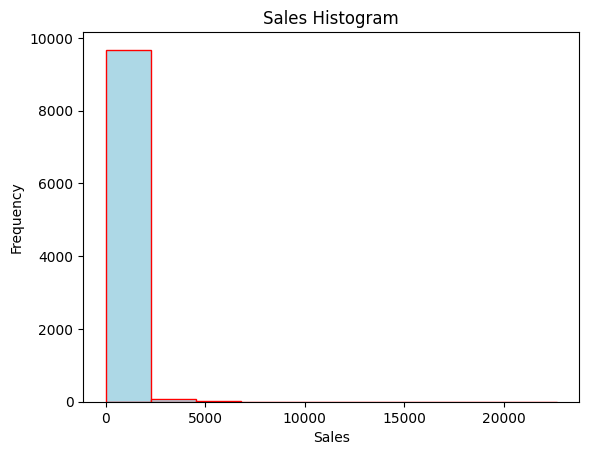

In [17]:
data=df["Sales"]
# Plotting histogram
plt.hist(data, color='lightblue', edgecolor='red')
# Adding labels and title
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Histogram')
# Display the plot
plt.show()

In [18]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [19]:
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: count, dtype: int64

In [20]:
df["Category"].value_counts()

Category
Office Supplies    5903
Furniture          2076
Technology         1810
Name: count, dtype: int64

In [21]:
df["Segment"].value_counts()

Segment
Consumer       5096
Corporate      2948
Home Office    1745
Name: count, dtype: int64

In [22]:
df["Region"].value_counts()

Region
West       3140
East       2774
Central    2277
South      1598
Name: count, dtype: int64

In [23]:
df["Sub-Category"].value_counts()

Sub-Category
Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Art             784
Accessories     754
Chairs          606
Appliances      458
Labels          357
Tables          314
Envelopes       247
Bookcases       225
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

### By Label encoding we are converting categorical features into numerical representations by assigning each unique category a specific label or numeric value.
### This process facilitates data visualization and analysis, making it easier for machine learning algorithms to interpret the data.

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Ship Mode"]=encoder.fit_transform(df["Ship Mode"])
df["Segment"]=encoder.fit_transform(df["Segment"])
df["Category"]=encoder.fit_transform(df["Category"])
df["Region"]=encoder.fit_transform(df["Region"])
df["Sub-Category"]=encoder.fit_transform(df["Sub-Category"])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   int32         
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   int32         
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   int32         
 12  Region         9789 non-null   int32         
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   int32         
 15  Sub-Category   9789 non-nu

In [26]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,2,FUR-BO-10001798,0,4,Bush Somerset Collection Bookcase,261.96


#### After applying label encoding, the categorical values in the specified column have been successfully replaced with corresponding numerical labels.

## Most used Ship mode

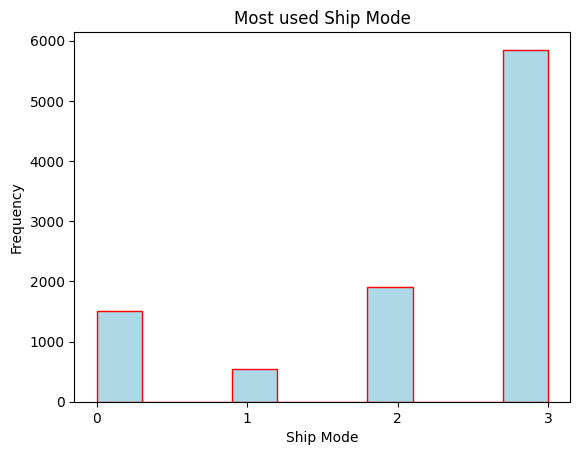

In [27]:
data=df["Ship Mode"]
# Plotting histogram
plt.hist(data, color='lightblue', edgecolor='red')
# Adding labels and title
plt.xticks([0,1,2,3])
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.title('Most used Ship Mode')
# Display the plot
plt.show()

## Step 6. Time Series Plots: Plot time series graphs to understand the trends and patterns in sales over the 4-year period.

In [28]:
df['Order_Year']=df["Order Date"].dt.year
df["Order_Year"]

0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9795    2017
9796    2016
9797    2016
9798    2016
9799    2016
Name: Order_Year, Length: 9789, dtype: int32

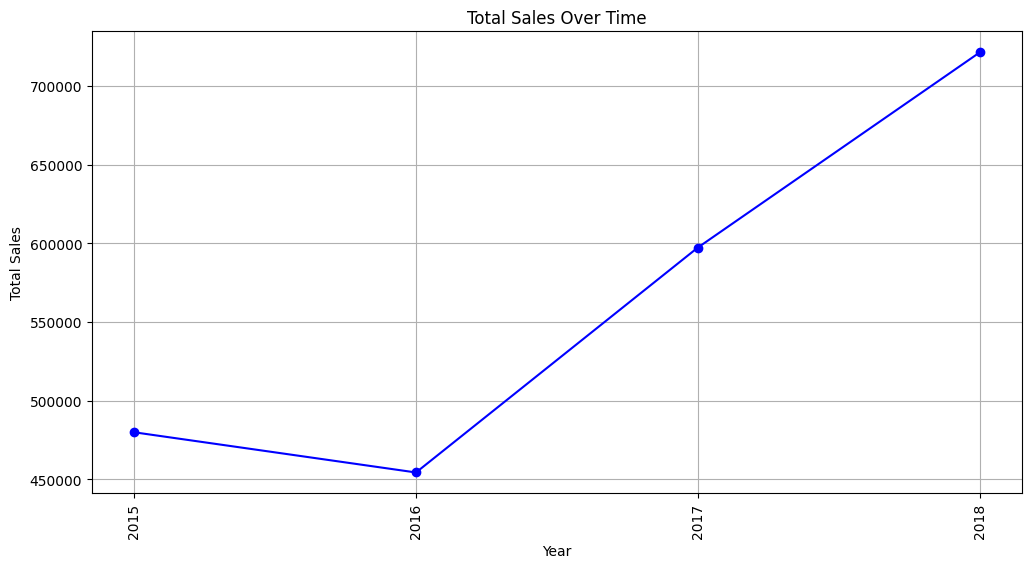

In [29]:
sales = df.groupby('Order_Year')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(sales['Order_Year'], sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(sales['Order_Year'],rotation=90)
plt.show()

### Sales experienced a decline in 2016 and despite the initial decline sales increase consistently from 2016 onwords. 
### This suggests that it led to improved sales performance

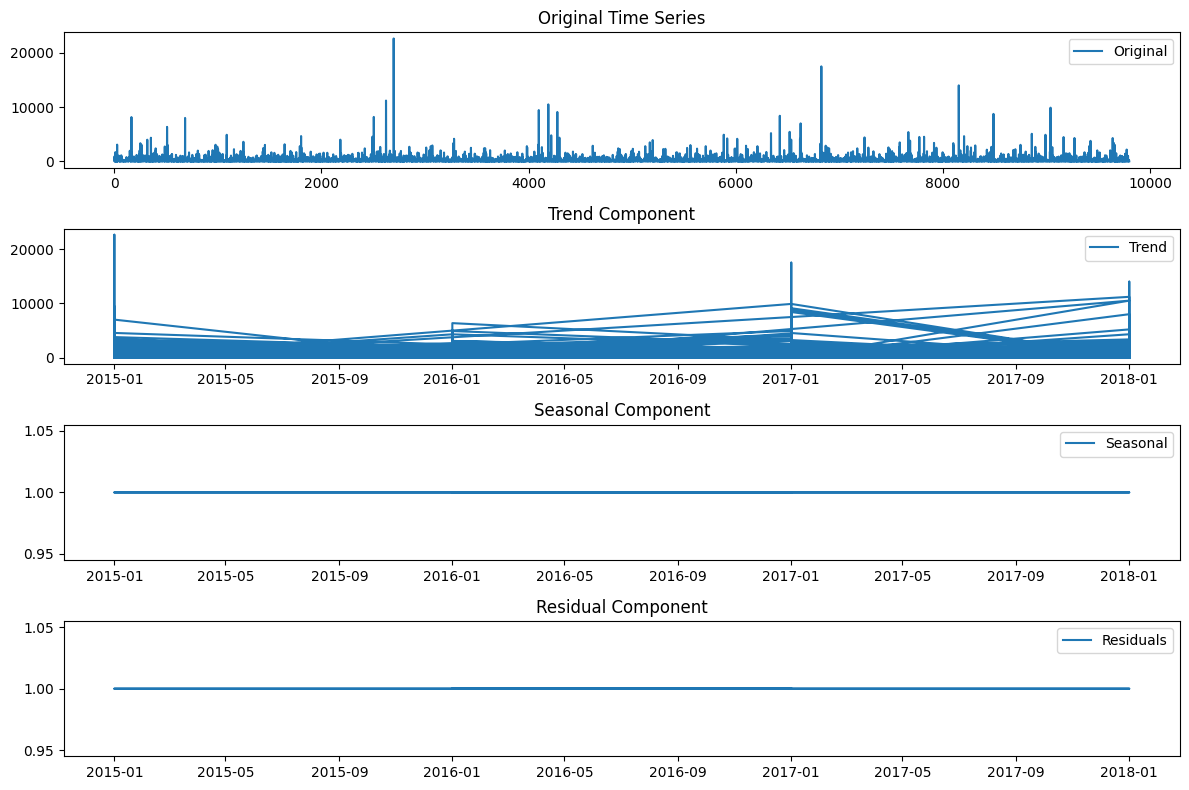

In [30]:

df1 = pd.DataFrame(df)

# Convert 'Order_Year' to datetime format and set it as index
df1['Order_Year'] = pd.to_datetime(df1['Order_Year'], format='%Y')
df1.set_index('Order_Year', inplace=True)

# Set frequency to 'Y' for yearly


# Perform seasonal decomposition
result = seasonal_decompose(df1['Sales'], model='multiplicative',period=1)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df['Sales'], label='Original')
plt.legend()
plt.title('Original Time Series')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.title('Trend Component')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

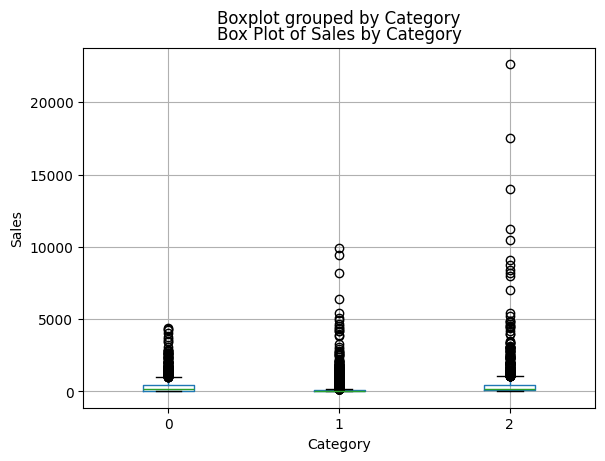

In [31]:
numeric_cols=df.select_dtypes(include="number")
# Create box plots for 'Sales' grouped by 'Category'
plt.figure(figsize=(10, 6))
df.boxplot(column='Sales', by='Category')
plt.title('Box Plot of Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()


### Step 9. Sales Distribution by Category: Visualize the distribution of sales across different categories using bar charts or pie charts.

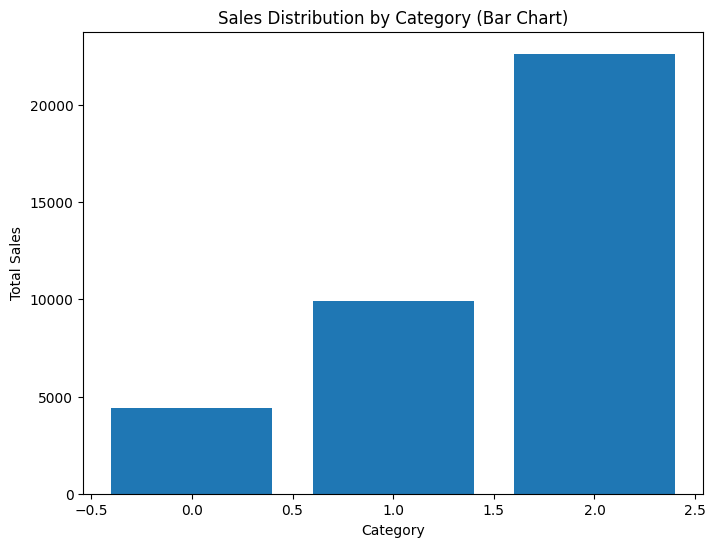

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(df['Category'], df['Sales'])
plt.title('Sales Distribution by Category (Bar Chart)')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

In [33]:
df['Order_Month']=df["Order Date"].dt.month
df['Order_Month']

0       11
1       11
2        6
3       10
4       10
        ..
9795     5
9796     1
9797     1
9798     1
9799     1
Name: Order_Month, Length: 9789, dtype: int32

### Step 10. Sales Variation Over Time: Plot line charts to observe how sales vary over different time periods (months, quarters, years).

In [34]:
monthly_sales = df.groupby('Order_Month')['Sales'].sum()
yearly_sales = df.groupby('Order_Year')['Sales'].sum()


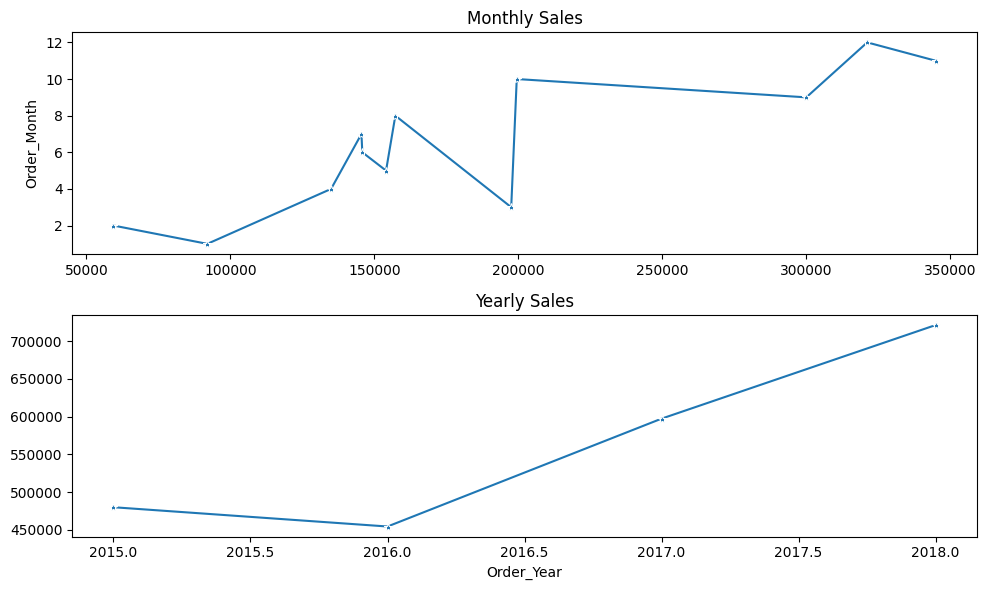

In [35]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1) #2 rows,1 col,1st plot
sns.lineplot(x=monthly_sales.values, y=monthly_sales.index, marker='*')
plt.title('Monthly Sales')

plt.subplot(2,1,2) #2 rows,1 col,2nd plot
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='*')
plt.title('Yearly Sales')

plt.tight_layout()


# Bivariate Analysis:
## 1. Correlation Analysis: Examine the correlation between sales and other relevant numeric variables.


In [36]:
print(df['Sales'].corr(df['Order_Year']))
print(df['Sales'].corr(df['Category']))


-0.010191686021349672
0.042443344541486766


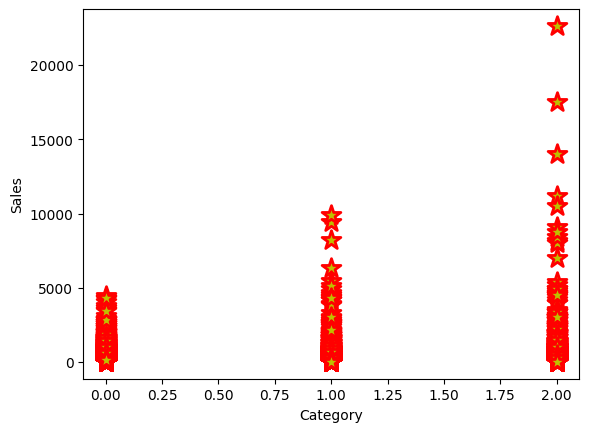

In [37]:
y=df["Sales"]
x=df["Category"]
plt.scatter(x, y,linewidths = 2,
            marker ="*", c="y",
            edgecolor ="red", 
            s = 200)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

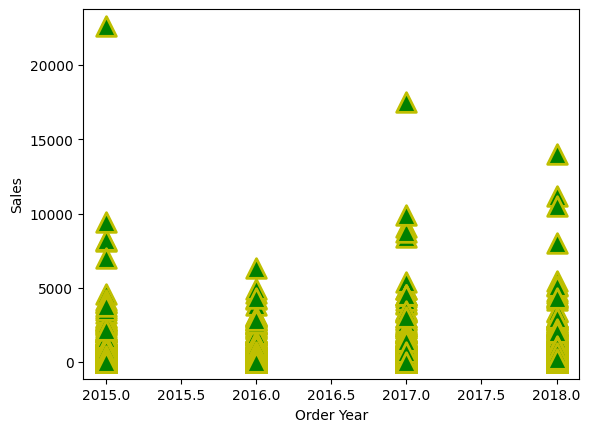

In [38]:
y=df["Sales"]
x=df["Order_Year"]
plt.scatter(x, y,linewidths = 2,
            marker ="^", c="g",
            edgecolor ="y", 
            s = 200)
plt.xlabel("Order Year")
plt.ylabel("Sales")
plt.show()

## 3. Pair Plots: Use pair plots for a quick overview of relationships between multiple numeric variables.

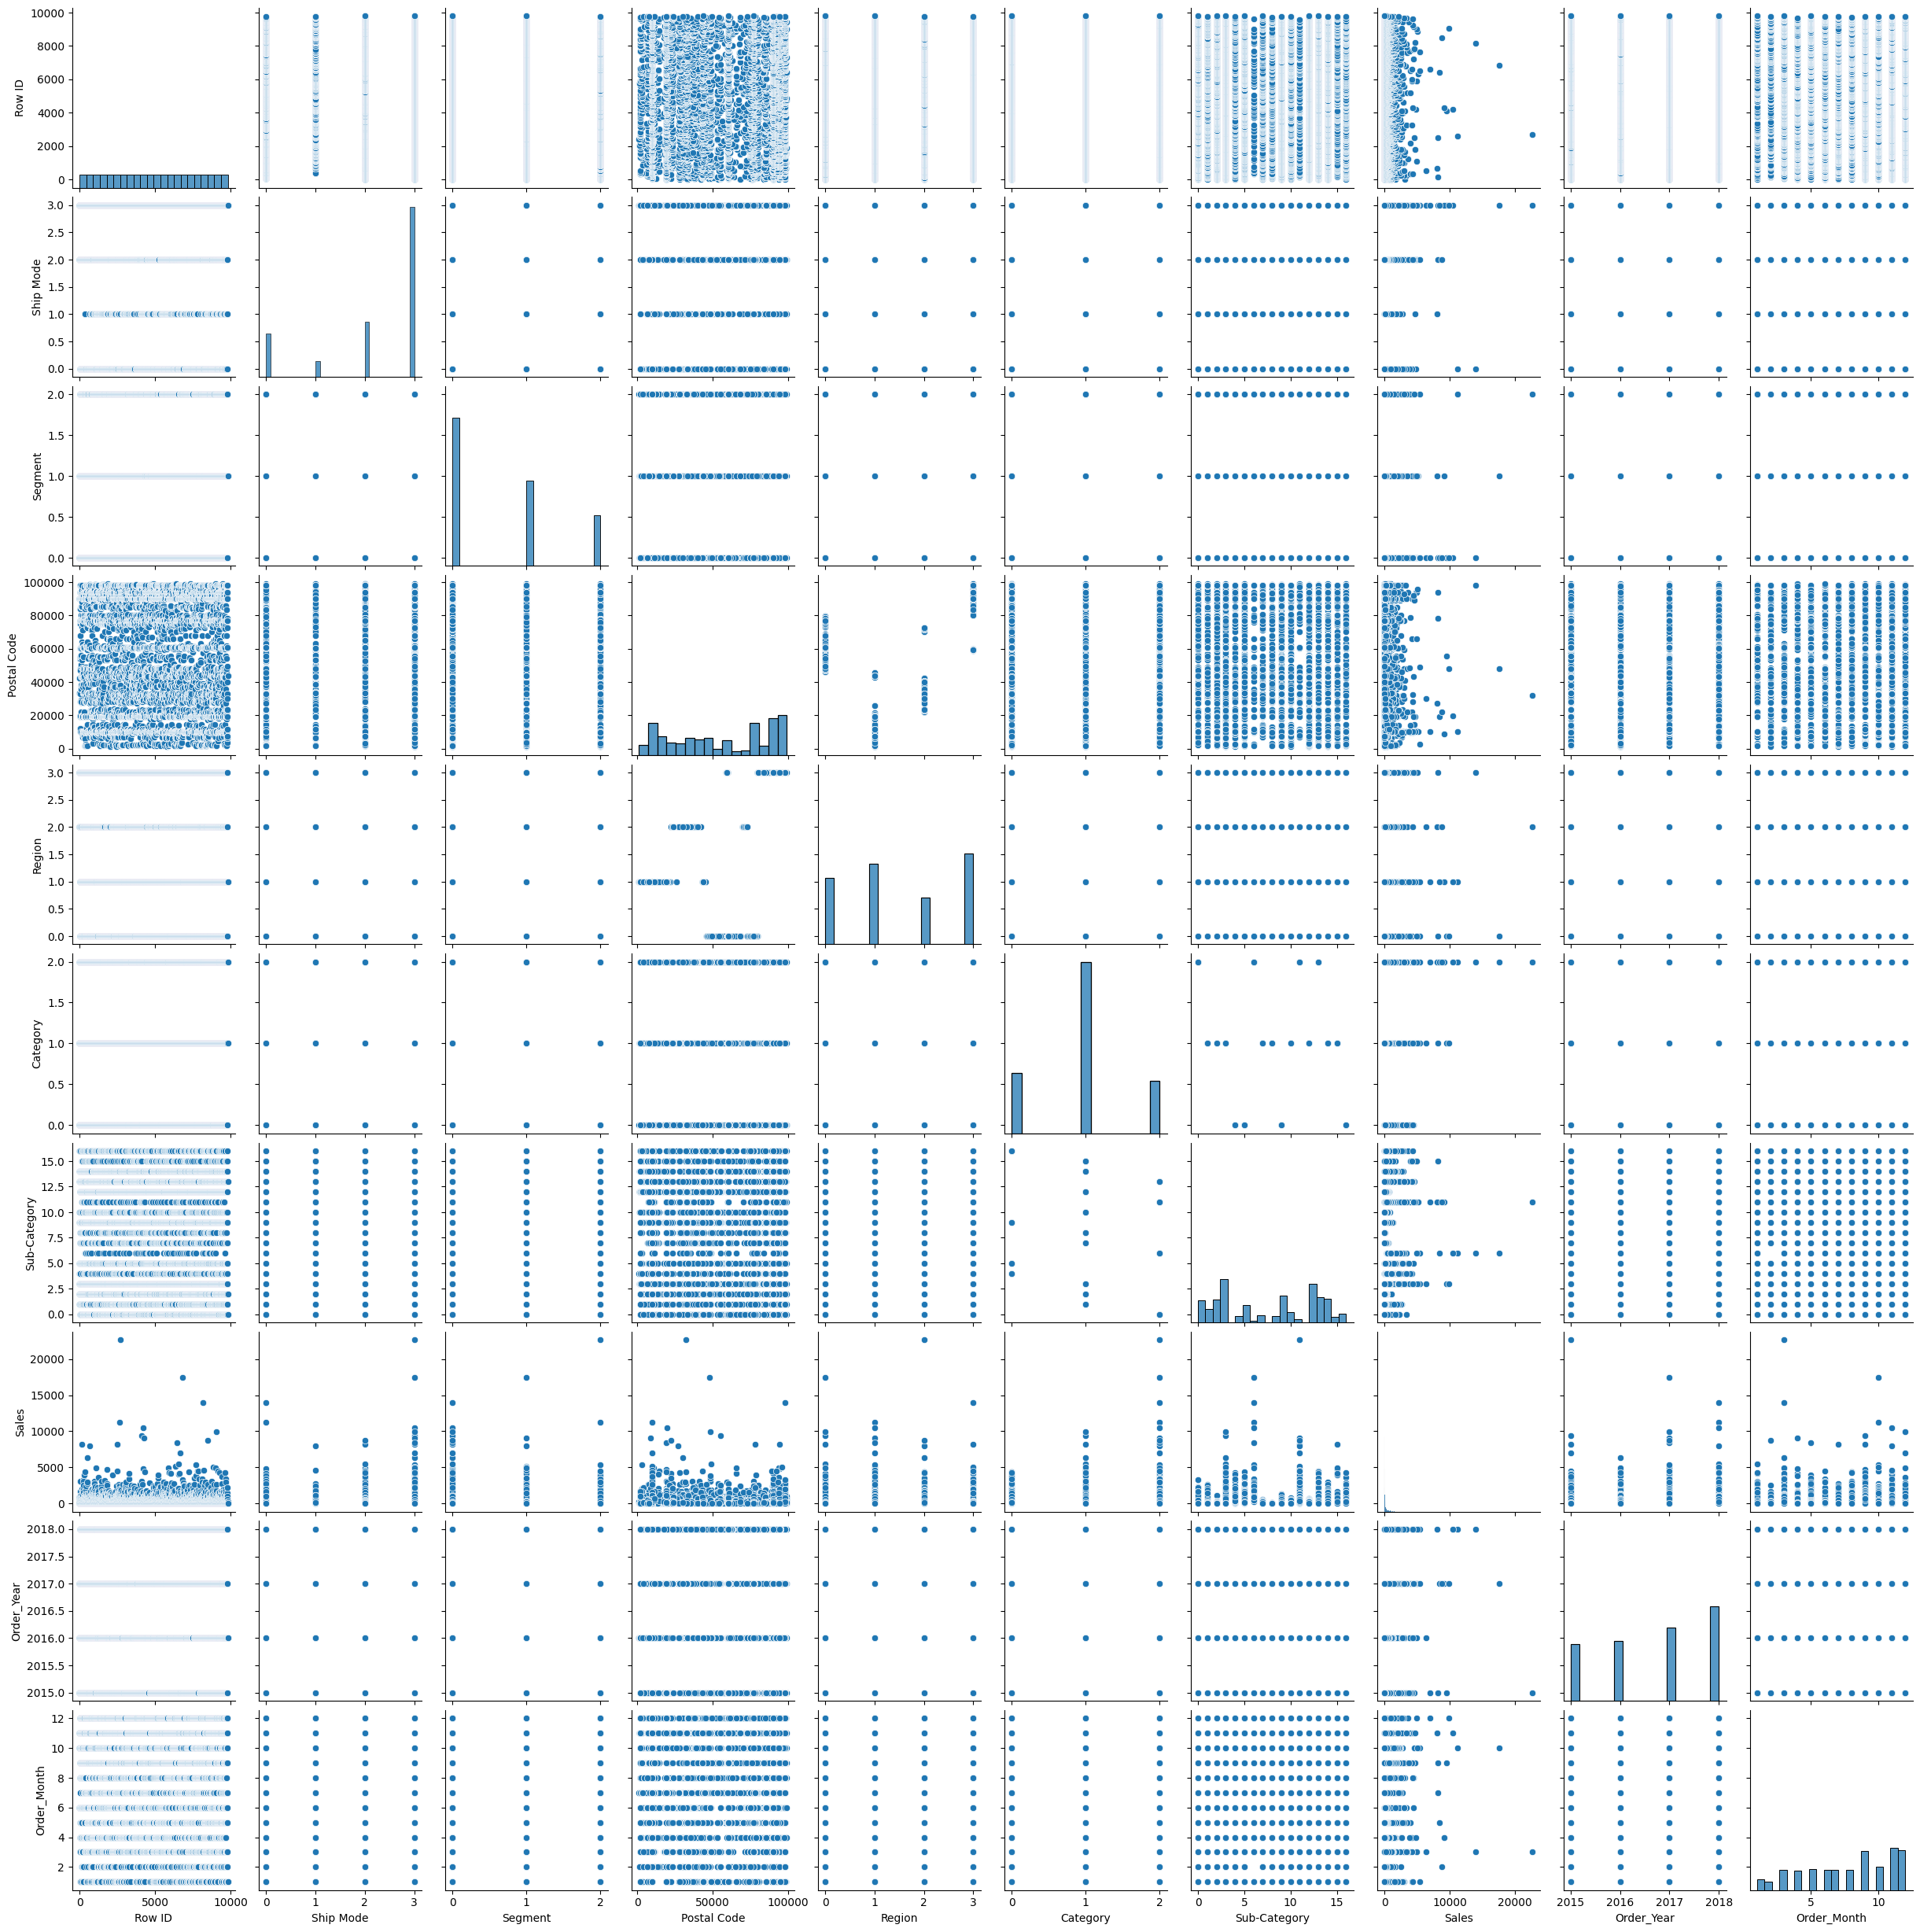

In [39]:
sns.pairplot(df)
plt.show()

## 4. Category-wise Sales Trends: Analyze how sales trends differ across different categories using line charts.

In [40]:
category=df["Category"]
sales=df["Sales"]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   int32         
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   int32         
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   int32         
 12  Region         9789 non-null   int32         
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   int32         
 15  Sub-Category   9789 non-nu

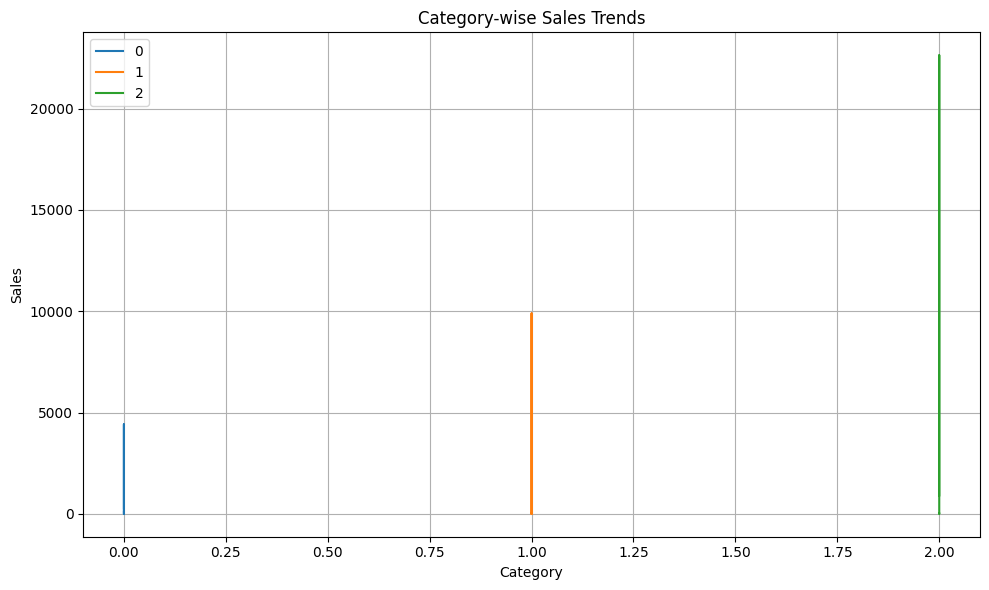

In [42]:
# Group data by category
grouped_data = df.groupby('Category')

# Plot line charts for each category
plt.figure(figsize=(10, 6)) 
for category, group in grouped_data:
    plt.plot(group['Category'], group['Sales'], label=category)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Category-wise Sales Trends')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

## 5. Heatmaps: Create heatmaps to visualize the correlation matrix for better insights.

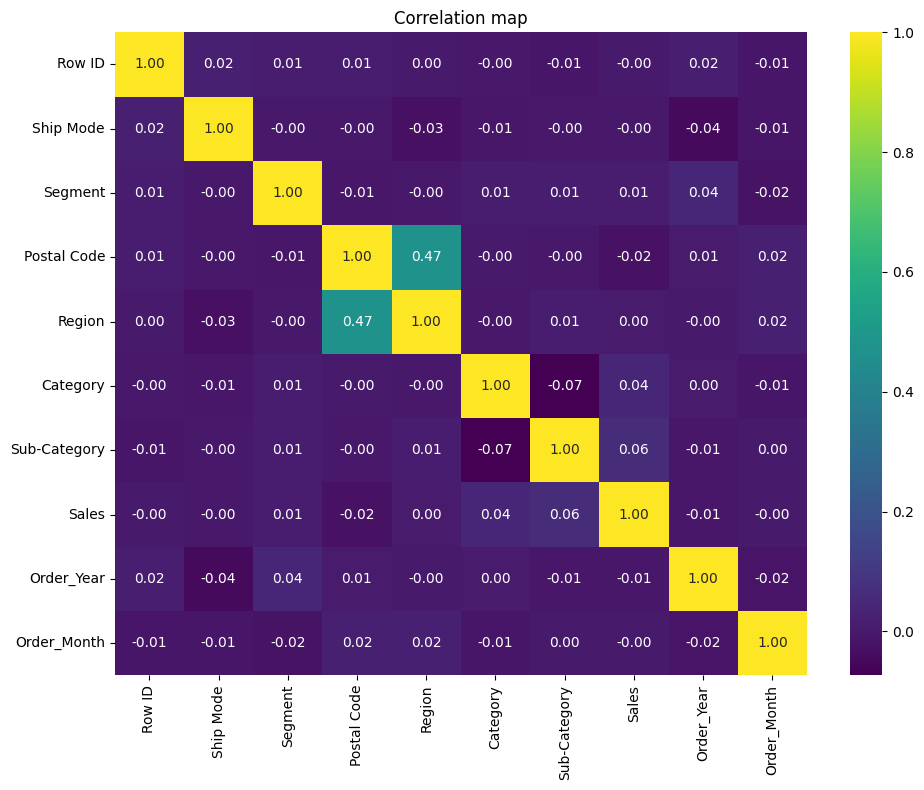

In [43]:
numeric=df.select_dtypes(include='number')
corr=numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation map')
plt.tight_layout()

## 6. Sales by Region: Compare sales across different regions using bar charts or stacked bar charts.

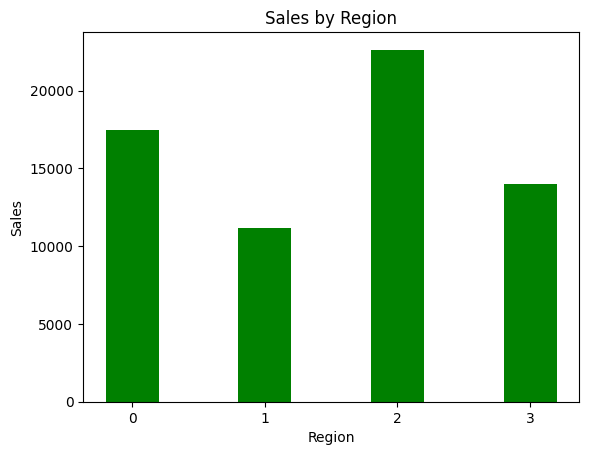

In [44]:
plt.bar(x=df["Region"],height=df["Sales"],color ='green',width = 0.4)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.xticks([0,1,2,3])
plt.title("Sales by Region")
plt.show()


## 7. Customer Segment Analysis: Explore sales trends for different customer segments using line charts or bar charts.

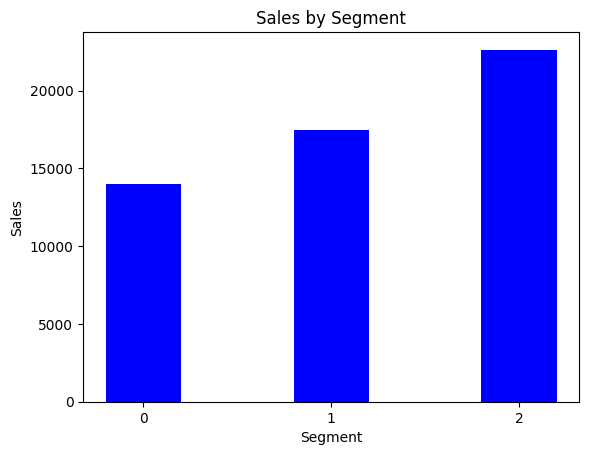

In [45]:
plt.bar(x=df["Segment"],height=df["Sales"],color ='blue',width = 0.4)
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.xticks([0,1,2])
plt.title("Sales by Segment")
plt.show()


In [46]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Year,Order_Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,2,FUR-BO-10001798,0,4,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,2,FUR-CH-10000454,0,5,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,2,DV-13045,Darrin Van Huff,1,United States,Los Angeles,California,90036,3,OFF-LA-10000240,1,10,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,33311,2,FUR-TA-10000577,0,16,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,33311,2,OFF-ST-10000760,1,14,Eldon Fold 'N Roll Cart System,22.3680,2016,10


## 11. Shipping Mode vs. Sales: Explore the relationship between shipping modes and sales using categorical plots.

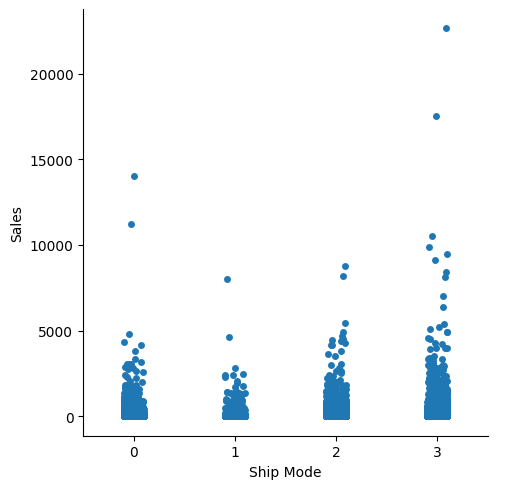

In [47]:
sns.catplot(x=df["Ship Mode"],y=df["Sales"],data=df)

In [48]:
df["Ship Mode"].value_counts()

Ship Mode
3    5849
2    1901
0    1501
1     538
Name: count, dtype: int64

## 12. Product-wise Sales Analysis: Investigate how sales vary for different products or categories using bar charts or line charts.

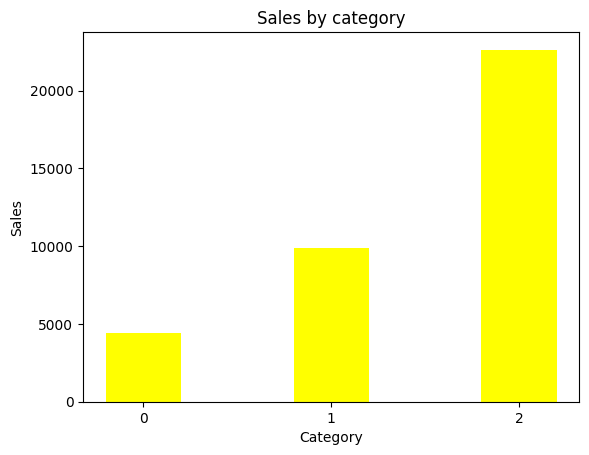

In [49]:
plt.bar(x=df["Category"],height=df["Sales"],color ='yellow',width = 0.4)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks([0,1,2])
plt.title("Sales by category")
plt.show()


## 13. Region-wise Product Sales: Compare product sales across different regions using grouped bar charts.

In [50]:
df["Region"].value_counts()

Region
3    3140
1    2774
0    2277
2    1598
Name: count, dtype: int64

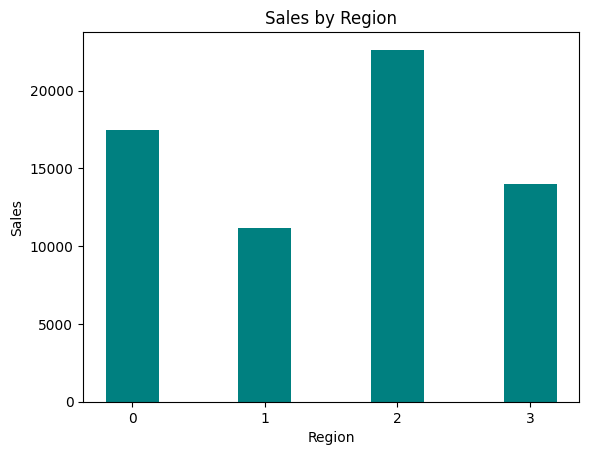

In [51]:
plt.bar(x=df["Region"],height=df["Sales"],color ='teal',width = 0.4)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.xticks([0,1,2,3])
plt.title("Sales by Region")
plt.show()


## 13. Region-wise Product Sales: Compare product sales across different regions using grouped bar charts.

C:\Users\hp\AppData\Local\Temp\ipykernel_10832\4149741539.py:2: FutureWarning: The provided callable <function sum at 0x000002A0EAB82FC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_df = pd.pivot_table(df, values='Sales', index='Sub-Category', columns='Region', aggfunc=np.sum, fill_value=0)


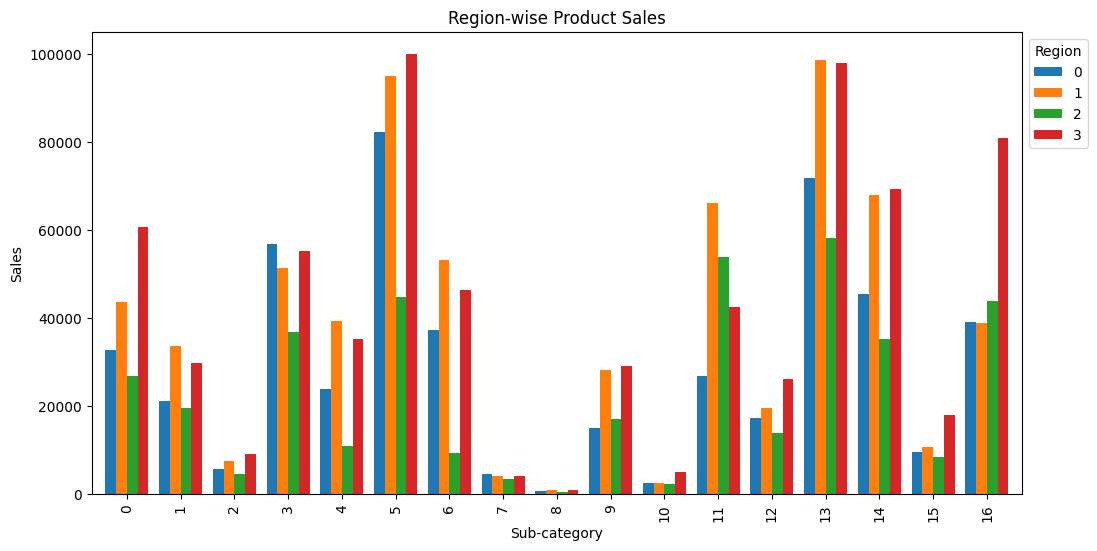

In [52]:

# Creating a pivot table to get region-wise product sales
pivot_df = pd.pivot_table(df, values='Sales', index='Sub-Category', columns='Region', aggfunc=np.sum, fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='bar', ax=ax, width=0.8)
plt.title('Region-wise Product Sales')
plt.xlabel('Sub-category')
plt.ylabel('Sales')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()